In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
SVM REGRESSOR :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html<br>
SVM CLASSIFIER :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
DECISION TREE CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
DECISION TREE Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
RANDOM FOREST REGRESSOR :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

METRICS:
R2_SCORE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
MSE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
MAE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>

WRITE THE CODE FOR IMPORTING THE DATA

In [64]:
#WRITE CODE HERE IMPORT THE DATA AS 'data'
data = pd.read_csv('WEEK4.csv')

In [65]:
data.shape

(2153, 21)

In [66]:
data.head()

price  year   mileage   color  AGE_IN_YEARS  chevrolet  dodge  gmc  jeep  \
0   2899  2011  190552.0  silver             3          0      0    0     0   
1   5350  2018   39590.0  silver             2          0      1    0     0   
2  25000  2014   64146.0    blue             2          0      0    0     0   
3  27700  2018    6654.0     red             3          1      0    0     0   
4   5700  2018   45561.0   white             1          0      1    0     0   

   nissan  ...  black  blue  gray  no_color  silver  white  Goa  MP  \
0       0  ...      0     0     0         0       1      0    0   0   
1       0  ...      0     0     0         0       1      0    0   1   
2       0  ...      0     1     0         0       0      0    0   0   
3       0  ...      0     0     0         0       0      0    0   0   
4       0  ...      0     0     0         0       0      1    0   0   

   Maharashtra  UP  
0            0   1  
1            0   0  
2            0   1  
3            1   0  
4            0   1  

[5 rows x 21 columns]

ONE HOT ENCODING THE COLOR COLUMN AND THEN DROPPING THE COLOR COLUMN

In [67]:
#ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)

In [68]:
# VIEWING THE DATA ONCE
data.head()

price  year   mileage  AGE_IN_YEARS  chevrolet  dodge  gmc  jeep  nissan  \
0   2899  2011  190552.0             3          0      0    0     0       0   
1   5350  2018   39590.0             2          0      1    0     0       0   
2  25000  2014   64146.0             2          0      0    0     0       0   
3  27700  2018    6654.0             3          1      0    0     0       0   
4   5700  2018   45561.0             1          0      1    0     0       0   

   salvage insurance  ...  Goa  MP  Maharashtra  UP  black  blue  gray  \
0                  0  ...    0   0            0   1      0     0     0   
1                  0  ...    0   1            0   0      0     0     0   
2                  0  ...    0   0            0   1      0     1     0   
3                  0  ...    0   0            1   0      0     0     0   
4                  0  ...    0   0            0   1      0     0     0   

   no_color  red  silver  
0         0    0       1  
1         0    0       1  
2         0    0       0  
3         0    1       0  
4         0    0       0  

[5 rows x 26 columns]

WE USE THE train_test_split_function TO SPLIT THE DATA INTO TRAIN AND TEST <br>
HERE WE IMPORT IT FROM SKLEARN

In [69]:
from sklearn.model_selection import train_test_split as tts

LET US LOOK AT THE PRICES DISTRIBUTION

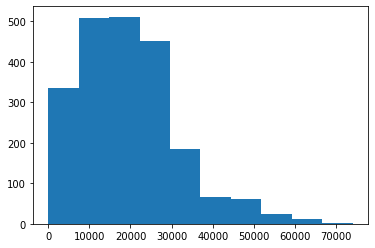

In [70]:
plt.hist(data['price']);

IT IS LEFT-SKEWED, WE HAVE LEARNT HOW TO HANDLE SKEWED DATA<br>
We will either use log transform or sqrt transform

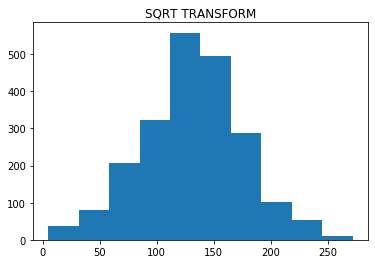

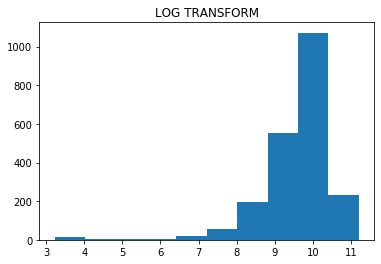

In [71]:
#WE HAVE WRITTEN THE CODE FOR PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
plt.hist(np.sqrt(data['price']));
plt.title('SQRT TRANSFORM');
plt.show()
plt.hist(np.log(data['price']));
plt.title('LOG TRANSFORM');
plt.show()

CLEARLY SQRT TRANSFORM IS BETTER

In [72]:
#WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']),2)

In [73]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [74]:
#LET US PRINT THE SHAPES
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('\nExpected shapes')
print((1722, 25))
print((431, 25))
print((1722,))
print((431,))
print('\nVerify if they are matching')

(1722, 25)
(431, 25)
(1722,)
(431,)

Expected shapes
(1722, 25)
(431, 25)
(1722,)
(431,)

Verify if they are matching


NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br>


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(Linreg.predict(X_test)))))
# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
print("Linear Regression Training mean_squared_error is " + str(mean_squared_error(np.square(y_train) , np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_squared_error is " + str(mean_squared_error(np.square(y_test) , np.square(Linreg.predict(X_test)))))


print("Linear Regression Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train) ,np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_absolute_error " + str(mean_absolute_error(np.square(y_test) , np.square(Linreg.predict(X_test)))))
# End code

print("\n")
print("The correct values are :")


print('Linear Regression Training R2 score is 0.3577935806672855')
print('Linear Regression Testing R2 score is 0.33405970134102436')
print('Linear Regression Training mean_square_error is 90997459.24038002')
print('Linear Regression Testing mean_square_error is 93998879.06677869')
print('Linear Regression Training mean_absolute_error is 6864.980505017769')
print('Linear Regression Testing mean_absolute_error is 6926.987292556893')

print("\nPlease verify if you have got the same values")

Linear Regression Training R2 score is 0.3577935806672947
Linear Regression Testing R2 score is 0.3340597013410348
Linear Regression Training mean_squared_error is 90997459.24037871
Linear Regression Testing mean_squared_error is 93998879.06677723
Linear Regression Training mean_absolute_error is 6864.98050501778
Linear Regression Testing mean_absolute_error 6926.987292556907


The correct values are :
Linear Regression Training R2 score is 0.3577935806672855
Linear Regression Testing R2 score is 0.33405970134102436
Linear Regression Training mean_square_error is 90997459.24038002
Linear Regression Testing mean_square_error is 93998879.06677869
Linear Regression Training mean_absolute_error is 6864.980505017769
Linear Regression Testing mean_absolute_error is 6926.987292556893

Please verify if you have got the same values


In [76]:
r2_score(np.square(y_train),np.square(Linreg.predict(X_train)))

0.3577935806672947

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF DECISION TREE IN REGRESSION <br>

In [77]:
from sklearn.tree import DecisionTreeRegressor

# INITIALIZE THE DECISION TREE WITH criterion as mse, max depth as 7 and Random State as 1
DTR = DecisionTreeRegressor(criterion='mse',max_depth= 7 , random_state= 1)
# USE THE FIT METHOD TO FIND THE R2_SCORE, MSE, MAE For training as well as testing data
DTR.fit(X_train , y_train)

print("Training R2 score is " + str(r2_score(np.square(y_train),np.square(DTR.predict(X_train)))))
print("Testing R2 score is " + str(r2_score(np.square(y_test),np.square(DTR.predict(X_test)))))

print(" Training mean_squared_error is " + str(mean_squared_error(np.square(y_train) , np.square(DTR.predict(X_train)))))
print("Testing mean_squared_error is " + str(mean_squared_error(np.square(y_test) , np.square(DTR.predict(X_test)))))


print("Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train) ,np.square(DTR.predict(X_train)))))
print("Testing mean_absolute_error " + str(mean_absolute_error(np.square(y_test) , np.square(DTR.predict(X_test)))))


Training R2 score is 0.422869230755335
Testing R2 score is 0.36145560633416207
 Training mean_squared_error is 81776562.90835412
Testing mean_squared_error is 90131889.2396716
Training mean_absolute_error is 6266.244817595775
Testing mean_absolute_error 6846.025816839579


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF SVM IN REGRESSION <br>

In [78]:
from sklearn.svm import SVR
# INITIALIZE THE SVM WITH kernel as 'poly', maximum number of iterations as 3000, degree as 2, C(regularization parameter) as 0.1 
SVR = SVR(kernel='poly', degree=2,C=0.1,max_iter=3000)
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

SVR.fit(X_train , y_train)

print("Training R2 score is " + str(r2_score(np.square(y_train),np.square(SVR.predict(X_train)))))
print("Testing R2 score is " + str(r2_score(np.square(y_test),np.square(SVR.predict(X_test)))))

print(" Training mean_squared_error is " + str(mean_squared_error(np.square(y_train) , np.square(SVR.predict(X_train)))))
print("Testing mean_squared_error is " + str(mean_squared_error(np.square(y_test) , np.square(SVR.predict(X_test)))))


print("Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train) ,np.square(SVR.predict(X_train)))))
print("Testing mean_absolute_error " + str(mean_absolute_error(np.square(y_test) , np.square(SVR.predict(X_test)))))


Training R2 score is -21.378337117720697
Testing R2 score is 0.0879391173112708
 Training mean_squared_error is 3170899197.5713468
Testing mean_squared_error is 128739319.10418974
Training mean_absolute_error is 9831.444528754593
Testing mean_absolute_error 8348.703212635415


YOU MIGHT SEE WORSE VALUES WHEN COMPARED TO LINEAR REGRESSION OR DECISION TREE AS THE DATA IS UNSCALED AND SVM REQUIRES MUCH MORE PREPROCESSING AND TUNING...BUT WE WON'T DO THAT HERE AS OUR AIM WAS JUST TO IMPLEMENT THE MODELS

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF Random Forest IN REGRESSION <br>

In [79]:
from sklearn.ensemble import RandomForestRegressor
# INITIALIZE THE Random Forest Regressor WITH no: of trees as 200, max_depth as 9, n_jobs as -1(read documentation for more details) and random state as 1 
RFR = RandomForestRegressor(n_estimators=200,max_depth=9, n_jobs=-1,random_state=1)

# FIT THE DATA using FIT METHOD
RFR.fit(X_train , y_train)

print("Training R2 score is " + str(r2_score(np.square(y_train),np.square(RFR.predict(X_train)))))
print("Testing R2 score is " + str(r2_score(np.square(y_test),np.square(RFR.predict(X_test)))))

print(" Training mean_squared_error is " + str(mean_squared_error(np.square(y_train) , np.square(RFR.predict(X_train)))))
print("Testing mean_squared_error is " + str(mean_squared_error(np.square(y_test) , np.square(RFR.predict(X_test)))))


print("Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train) ,np.square(RFR.predict(X_train)))))
print("Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test) , np.square(RFR.predict(X_test)))))


Training R2 score is 0.5524364393379151
Testing R2 score is 0.3997413290406362
 Training mean_squared_error is 63417533.12143005
Testing mean_squared_error is 84727778.65210524
Training mean_absolute_error is 5528.669046457424
Testing mean_absolute_error is 6695.668840563838


NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES

In [80]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()


count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000

In [81]:
data.loc[np.square(data['price']) < 20000,'price'] = 0
data.loc[np.square(data['price']) >= 20000,'price'] = 1

In [82]:
data.head()

price  year   mileage  AGE_IN_YEARS  chevrolet  dodge  gmc  jeep  nissan  \
0    0.0  2011  190552.0             3          0      0    0     0       0   
1    0.0  2018   39590.0             2          0      1    0     0       0   
2    1.0  2014   64146.0             2          0      0    0     0       0   
3    1.0  2018    6654.0             3          1      0    0     0       0   
4    0.0  2018   45561.0             1          0      1    0     0       0   

   salvage insurance  ...  Goa  MP  Maharashtra  UP  black  blue  gray  \
0                  0  ...    0   0            0   1      0     0     0   
1                  0  ...    0   1            0   0      0     0     0   
2                  0  ...    0   0            0   1      0     1     0   
3                  0  ...    0   0            1   0      0     0     0   
4                  0  ...    0   0            0   1      0     0     0   

   no_color  red  silver  
0         0    0       1  
1         0    0       1  
2         0    0       0  
3         0    1       0  
4         0    0       0  

[5 rows x 26 columns]

In [83]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [85]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, C as 0.5 and penalty as 'l2' and random_state as 1 
LR = LogisticRegression(penalty='l2',C=0.5, random_state=1, solver='lbfgs', max_iter=2000)
# FIT SVM ON TRAINING DATA
LR.fit(X_train , y_train)
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR LOGISTIC REGRESSION
y_pred = LR.predict(X_train)
y_pred_test = LR.predict(X_test)
cm_tr  = confusion_matrix(y_train, y_pred).ravel()
cm_te = confusion_matrix(y_test, y_pred_test).ravel()
sensitivity_tr = cm_tr[3]/(cm_tr[3]+cm_tr[2])
specificity_tr = cm_tr[0]/(cm_tr[0]+cm_tr[1])
tpr_tr = sensitivity_tr
fpr_tr = 1 - specificity_tr
# USE THE IMPORTED CONFUSION MATRIX
sensitivity_te = cm_te[3]/(cm_te[3]+cm_te[2])
specificity_te = cm_te[0]/(cm_te[0]+cm_te[1])
tpr_te = sensitivity_te
fpr_te = 1 - specificity_te
# START CODE
print('TPR IN TRAINING DATA : ' , tpr_tr)
print('FPR IN TRAINING DATA : ' , fpr_tr)
print('SENSITIVITY IN TRAINING DATA : ' , sensitivity_tr)
print('SPECIFICITY IN TRAINING DATA : ' , specificity_tr)
print('ACCURACY IN TRAINING DATA : ' , accuracy_score(y_train, y_pred))
# END CODE

print('TPR IN TEST DATA : ' , tpr_te)
print('FPR IN TEST DATA : ' , fpr_te)
print('SENSITIVITY IN TEST DATA : ' , sensitivity_te)
print('SPECIFICITY IN TEST DATA : ' , specificity_te)
print('ACCURACY IN TEST DATA : ' , accuracy_score(y_test, y_pred_test))

TPR IN TRAINING DATA :  0.6502115655853314
FPR IN TRAINING DATA :  0.22803553800592302
SENSITIVITY IN TRAINING DATA :  0.6502115655853314
SPECIFICITY IN TRAINING DATA :  0.771964461994077
ACCURACY IN TRAINING DATA :  0.721835075493612
TPR IN TEST DATA :  0.6542553191489362
FPR IN TEST DATA :  0.22633744855967075
SENSITIVITY IN TEST DATA :  0.6542553191489362
SPECIFICITY IN TEST DATA :  0.7736625514403292
ACCURACY IN TEST DATA :  0.7215777262180975


In [86]:
# INITIALIZE SVM BY TAKING kernal as 'rbf', max_iter as 1000 and random_state as 1
SVC = SVC(kernel='rbf' , max_iter=1000, random_state=1)
SVC.fit(X_train , y_train)
y_pred = SVC.predict(X_train)
y_pred_test = SVC.predict(X_test)
cm_tr  = confusion_matrix(y_train, y_pred).ravel()
cm_te = confusion_matrix(y_test, y_pred_test).ravel()
sensitivity_tr = cm_tr[3]/(cm_tr[3]+cm_tr[2])
specificity_tr = cm_tr[0]/(cm_tr[0]+cm_tr[1])
tpr_tr = sensitivity_tr
fpr_tr = 1 - specificity_tr
# USE THE IMPORTED CONFUSION MATRIX
sensitivity_te = cm_te[3]/(cm_te[3]+cm_te[2])
specificity_te = cm_te[0]/(cm_te[0]+cm_te[1])
tpr_te = sensitivity_te
fpr_te = 1 - specificity_te
# START CODE
print('TPR IN TRAINING DATA : ' , tpr_tr)
print('FPR IN TRAINING DATA : ' , fpr_tr)
print('SENSITIVITY IN TRAINING DATA : ' , sensitivity_tr)
print('SPECIFICITY IN TRAINING DATA : ' , specificity_tr)
print('ACCURACY IN TRAINING DATA : ' , accuracy_score(y_train, y_pred))
# END CODE

print('TPR IN TEST DATA : ' , tpr_te)
print('FPR IN TEST DATA : ' , fpr_te)
print('SENSITIVITY IN TEST DATA : ' , sensitivity_te)
print('SPECIFICITY IN TEST DATA : ' , specificity_te)
print('ACCURACY IN TEST DATA : ' , accuracy_score(y_test, y_pred_test))

TPR IN TRAINING DATA :  0.5063469675599436
FPR IN TRAINING DATA :  0.14906219151036526
SENSITIVITY IN TRAINING DATA :  0.5063469675599436
SPECIFICITY IN TRAINING DATA :  0.8509378084896347
ACCURACY IN TRAINING DATA :  0.7090592334494773
TPR IN TEST DATA :  0.5372340425531915
FPR IN TEST DATA :  0.13991769547325106
SENSITIVITY IN TEST DATA :  0.5372340425531915
SPECIFICITY IN TEST DATA :  0.8600823045267489
ACCURACY IN TEST DATA :  0.7192575406032483


In [87]:

# INITIALIZE DECISION TREE CLASSIFIER BY TAKING criterion as 'gini' , max_depth as 3, and random_state as 1
DTC = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1 )
DTC.fit(X_train , y_train)
y_pred = DTC.predict(X_train)
y_pred_test = DTC.predict(X_test)
cm_tr  = confusion_matrix(y_train, y_pred).ravel()
cm_te = confusion_matrix(y_test, y_pred_test).ravel()
sensitivity_tr = cm_tr[3]/(cm_tr[3]+cm_tr[2])
specificity_tr = cm_tr[0]/(cm_tr[0]+cm_tr[1])
tpr_tr = sensitivity_tr
fpr_tr = 1 - specificity_tr
# USE THE IMPORTED CONFUSION MATRIX
sensitivity_te = cm_te[3]/(cm_te[3]+cm_te[2])
specificity_te = cm_te[0]/(cm_te[0]+cm_te[1])
tpr_te = sensitivity_te
fpr_te = 1 - specificity_te
# START CODE
print('TPR IN TRAINING DATA : ' , tpr_tr)
print('FPR IN TRAINING DATA : ' , fpr_tr)
print('SENSITIVITY IN TRAINING DATA : ' , sensitivity_tr)
print('SPECIFICITY IN TRAINING DATA : ' , specificity_tr)
print('ACCURACY IN TRAINING DATA : ' , accuracy_score(y_train, y_pred))
# END CODE

print('TPR IN TEST DATA : ' , tpr_te)
print('FPR IN TEST DATA : ' , fpr_te)
print('SENSITIVITY IN TEST DATA : ' , sensitivity_te)
print('SPECIFICITY IN TEST DATA : ' , specificity_te)
print('ACCURACY IN TEST DATA : ' , accuracy_score(y_test, y_pred_test))

TPR IN TRAINING DATA :  0.5430183356840621
FPR IN TRAINING DATA :  0.12240868706811447
SENSITIVITY IN TRAINING DATA :  0.5430183356840621
SPECIFICITY IN TRAINING DATA :  0.8775913129318855
ACCURACY IN TRAINING DATA :  0.7398373983739838
TPR IN TEST DATA :  0.5638297872340425
FPR IN TEST DATA :  0.1152263374485597
SENSITIVITY IN TEST DATA :  0.5638297872340425
SPECIFICITY IN TEST DATA :  0.8847736625514403
ACCURACY IN TEST DATA :  0.7447795823665894


In [89]:
# INITIALIZE RANDOM FOREST CLASSIFIER BY TAKING no:of trees as 100 , max_depth as 3,criterion as 'gini' and random_state as 1 
RFC = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=3, random_state=1)
RFC.fit(X_train , y_train)
y_pred = RFC.predict(X_train)
y_pred_test = RFC.predict(X_test)
cm_tr  = confusion_matrix(y_train, y_pred).ravel()
cm_te = confusion_matrix(y_test, y_pred_test).ravel()
sensitivity_tr = cm_tr[3]/(cm_tr[3]+cm_tr[2])
specificity_tr = cm_tr[0]/(cm_tr[0]+cm_tr[1])
tpr_tr = sensitivity_tr
fpr_tr = 1 - specificity_tr
# USE THE IMPORTED CONFUSION MATRIX
sensitivity_te = cm_te[3]/(cm_te[3]+cm_te[2])
specificity_te = cm_te[0]/(cm_te[0]+cm_te[1])
tpr_te = sensitivity_te
fpr_te = 1 - specificity_te
# START CODE
print('TPR IN TRAINING DATA : ' , tpr_tr)
print('FPR IN TRAINING DATA : ' , fpr_tr)
print('SENSITIVITY IN TRAINING DATA : ' , sensitivity_tr)
print('SPECIFICITY IN TRAINING DATA : ' , specificity_tr)
print('ACCURACY IN TRAINING DATA : ' , accuracy_score(y_train, y_pred))
# END CODE

print('TPR IN TEST DATA : ' , tpr_te)
print('FPR IN TEST DATA : ' , fpr_te)
print('SENSITIVITY IN TEST DATA : ' , sensitivity_te)
print('SPECIFICITY IN TEST DATA : ' , specificity_te)
print('ACCURACY IN TEST DATA : ' ,accuracy_score(y_test, y_pred_test))

TPR IN TRAINING DATA :  0.5444287729196051
FPR IN TRAINING DATA :  0.12043435340572561
SENSITIVITY IN TRAINING DATA :  0.5444287729196051
SPECIFICITY IN TRAINING DATA :  0.8795656465942744
ACCURACY IN TRAINING DATA :  0.7415795586527294
TPR IN TEST DATA :  0.5638297872340425
FPR IN TEST DATA :  0.11934156378600824
SENSITIVITY IN TEST DATA :  0.5638297872340425
SPECIFICITY IN TEST DATA :  0.8806584362139918
ACCURACY IN TEST DATA :  0.7424593967517401
